In [483]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk

1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column

In [484]:
titanic=pd.read_csv('/content/titanic_dataset.csv',index_col="PassengerId")

In [485]:
data=titanic.copy()

3. Check the basic details of the dataset

In [486]:
  data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [487]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [488]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [489]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

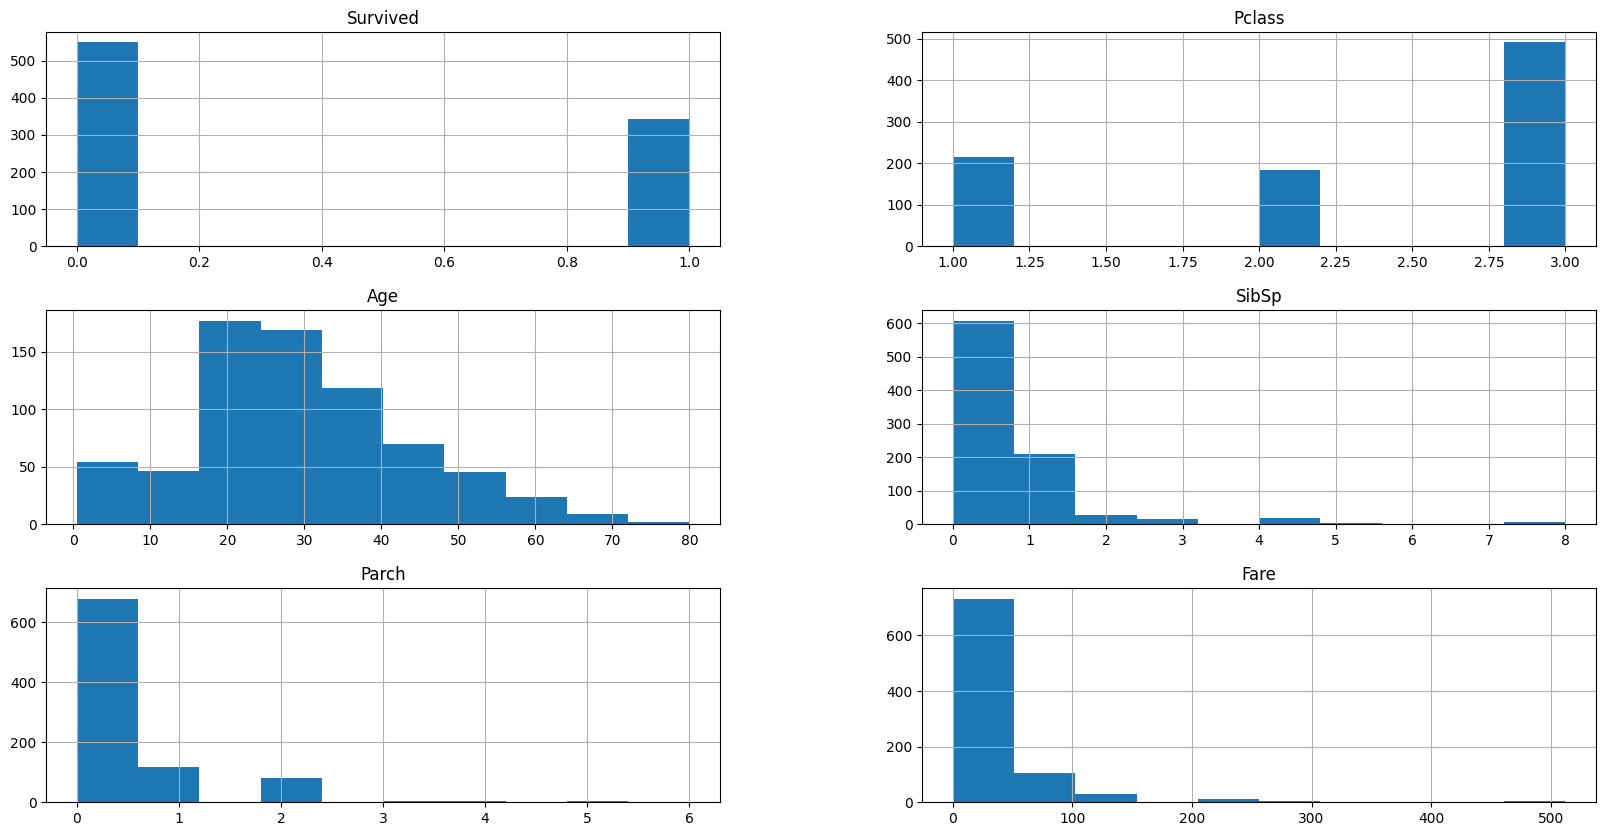

In [490]:
graphs = data.select_dtypes(include=['int64', 'float64'])
graphs.hist(figsize=(20, 10))
plt.show()

4. Fill in all the missing values present in all the columns in the dataset

In [491]:
# Checking for null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [492]:
# Filling of null values
data['Age']=data['Age'].fillna(data['Age'].median())
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [493]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [494]:
#convert datatype of Age to Int
data['Age']=data['Age'].astype(int)

In [495]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,B96 B98,S


In [496]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


5. Check and handle outliers in at least 3 columns in the dataset

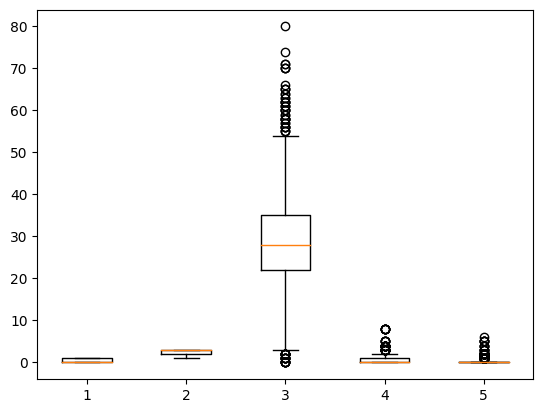

In [497]:
# Checking for outliers
graphs = data.select_dtypes(include=['int64'])
plt.boxplot(graphs)
plt.show()

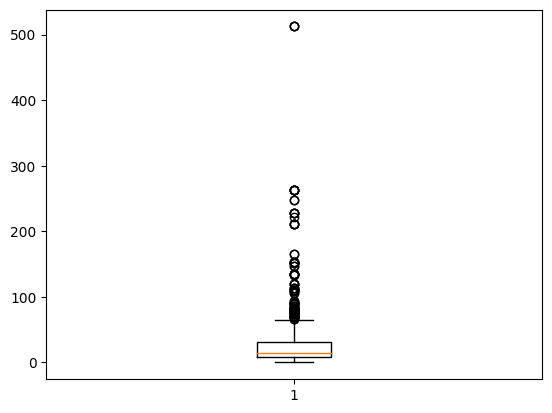

In [498]:
graphs = data.select_dtypes(include=['float64'])
plt.boxplot(graphs)
plt.show()

In [499]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [500]:
# Handling Outliers
Q1 = np.percentile(data['Age'],25,method='midpoint')
Q2 = np.percentile(data['Age'],50,method='midpoint')
Q3 = np.percentile(data['Age'],75,method='midpoint')

print('Q1 for Age =',Q1,'\nQ2 for Age =',Q2,'\nQ3 for Age =',Q3)
IQR = Q3-Q1
print('IQR =',IQR)
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)
outlier =[]
for x in data['Age']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)

Q1 for Age = 22.0 
Q2 for Age = 28.0 
Q3 for Age = 35.0
IQR = 13.0
lower whisker:  2.5
upper whisker:  54.5
[2, 58, 55, 2, 66, 65, 0, 59, 71, 70, 2, 55, 1, 61, 1, 56, 1, 58, 2, 59, 62, 58, 63, 65, 2, 0, 61, 2, 60, 1, 1, 64, 65, 56, 0, 2, 63, 58, 55, 71, 2, 64, 62, 62, 60, 61, 57, 80, 2, 0, 56, 58, 70, 60, 60, 70, 0, 57, 1, 0, 2, 1, 62, 0, 74, 56]


In [501]:
#clipping outliers
data['Age'] = data['Age'].clip(lower=low_lim,upper=up_lim)
outlier =[]
for x in data['Age']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)

[]


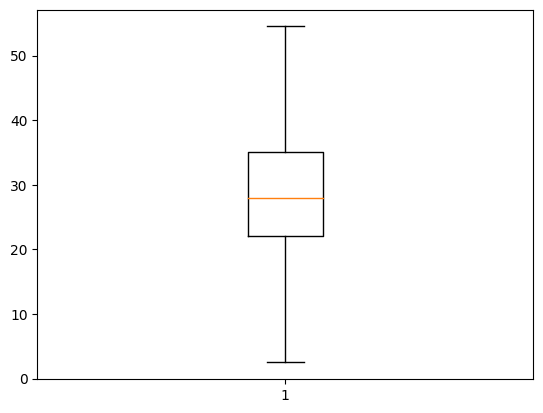

In [502]:
plt.boxplot(data['Age'])
plt.show()

In [503]:
Q1 = np.percentile(data['SibSp'],25,method='midpoint')
Q2 = np.percentile(data['SibSp'],50,method='midpoint')
Q3 = np.percentile(data['SibSp'],75,method='midpoint')

print('Q1 for SibSp =',Q1,'\nQ2 for SibSp =',Q2,'\nQ3 for SibSp =',Q3)
IQR = Q3-Q1
print('IQR =',IQR)
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)
outlier =[]
for x in data['SibSp']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)

Q1 for SibSp = 0.0 
Q2 for SibSp = 0.0 
Q3 for SibSp = 1.0
IQR = 1.0
lower whisker:  -1.5
upper whisker:  2.5
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [504]:
data['SibSp'] = data['SibSp'].clip(lower=low_lim,upper=up_lim)
outlier =[]
for x in data['SibSp']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)

[]


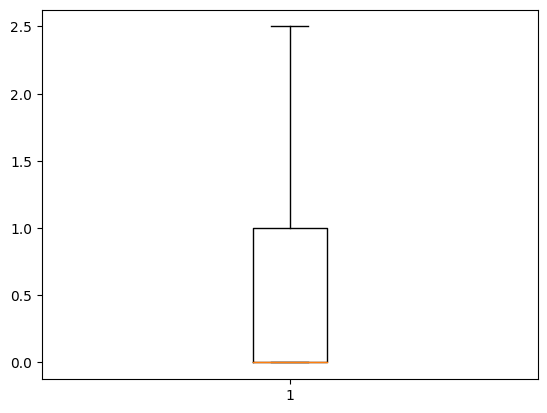

In [505]:
plt.boxplot(data['SibSp'])
plt.show()

In [506]:
Q1 = np.percentile(data['Fare'],25,method='midpoint')
Q2 = np.percentile(data['Fare'],50,method='midpoint')
Q3 = np.percentile(data['Fare'],75,method='midpoint')

print('Q1 for Fare =',Q1,'\nQ2 for Fare =',Q2,'\nQ3 for Fare =',Q3)
IQR = Q3-Q1
print('IQR =',IQR)
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)
outlier =[]
for x in data['Fare']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)

Q1 for Fare = 7.9104 
Q2 for Fare = 14.4542 
Q3 for Fare = 31.0
IQR = 23.0896
lower whisker:  -26.724
upper whisker:  65.6344
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 8

In [507]:
data['Fare'] = data['Fare'].clip(lower=low_lim,upper=up_lim)
outlier =[]
for x in data['Fare']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)

[]


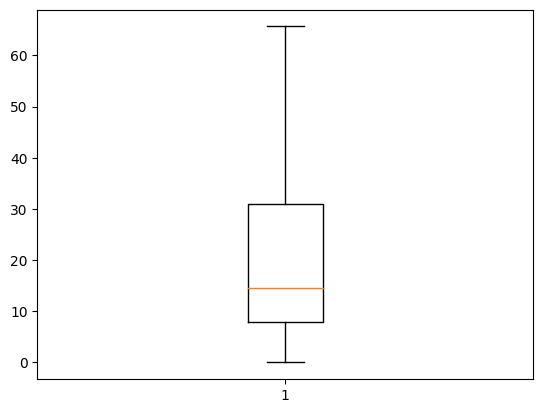

In [508]:
plt.boxplot(data['Fare'])
plt.show()

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [511]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 83.5+ KB


In [513]:
x=data.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked'],axis=1)
x.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1.0,0,7.2500
2,1,38.0,1.0,0,65.6344
3,3,26.0,0.0,0,7.9250
4,1,35.0,1.0,0,53.1000
5,3,35.0,0.0,0,8.0500


In [516]:
import sklearn


In [517]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.030303,0.426487,0.381594,24.046813
std,0.836071,12.070192,0.708246,0.806057,20.481625
min,1.000000,2.500000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,54.500000,2.500000,6.000000,65.634400


In [519]:
minmax=sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))
x_mm=minmax.fit_transform(x)
x_mm=pd.DataFrame(x_mm)

In [520]:
x_mm.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.510198,0.170595,0.063599,0.366375
std,0.418036,0.232119,0.283298,0.134343,0.312056
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.000000,0.000000,0.120522
50%,1.000000,0.490385,0.000000,0.000000,0.220223
75%,1.000000,0.625000,0.400000,0.000000,0.472313
max,1.000000,1.000000,1.000000,1.000000,1.000000


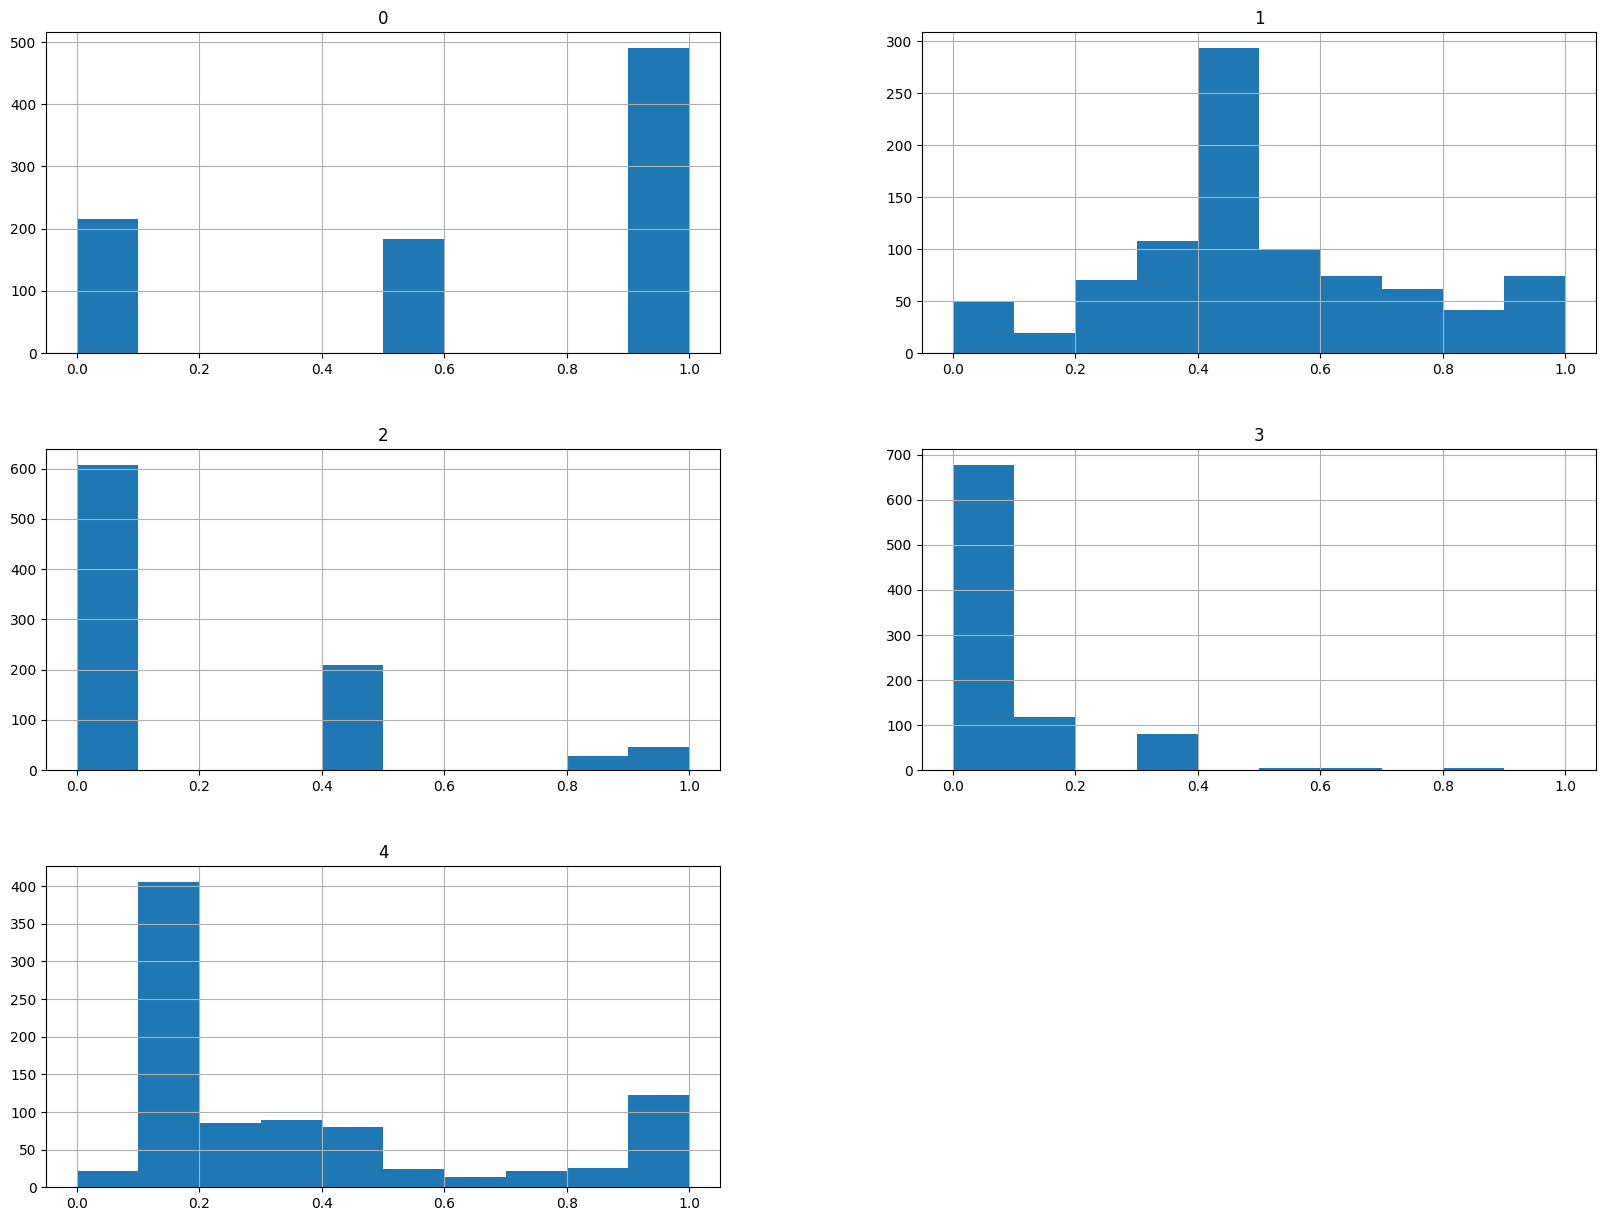

In [521]:
x_mm.hist(figsize=(20,15))
plt.show()